In [11]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns


Referido a las conceptualizaciones del equipo, decidimos hacer el EDA PRELIMINAR enfocandonos en los TRES estados mas prosperos (mayor PBI per capita) y los TRES estados menos prosperos dentro de los disponibles entre los tres datasets obligatorios

3 MAS PROSPEROS : California, Delaware, Illinois.
3 menos prosperos : Idaho, Lousiana, Missouri.

El Dataset reviews_estados contiene los reviews en varios json por lo que vamos a unirlos.

In [6]:
def joinjson(folder_path):
    
    # Lista para almacenar DataFrames de cada archivo JSON
    dfs = []

    # Itera sobre los archivos y carga cada uno en un DataFrame
    for file_path in glob.glob(folder_path):
        df_temporal = pd.read_json(file_path, lines=True)
        dfs.append(df_temporal)

    # Concatena los DataFrames en uno solo
    df_concatenated = pd.concat(dfs, ignore_index=True)
    
    return df_concatenated

In [7]:
df_california = joinjson('review-California/*.json')
df_california

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.172290e+20,C Fanslow,1581796328306,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
1,1.034675e+20,С К,1569991161528,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
2,1.001862e+20,sumit pattanayak,1571618648867,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
3,1.176301e+20,Annie Tong,1590701106860,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
4,1.142755e+20,D Buck,1570111600889,4,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
...,...,...,...,...,...,...,...,...
2699995,1.113423e+20,Byunguk Kim,1573362674409,5,None,None,None,0x80c2bea30829f279:0x39aa953ee93734ed
2699996,1.080818e+20,Ceveda Craytonhooks,1580608853411,5,Beautiful salon. The staff and atmosphere were...,None,None,0x8094675073616747:0x9f935a9b9046a9ba
2699997,1.175914e+20,Natacha Thompson,1528597806165,5,Flo is a great beautician. She is very patie...,[{'url': ['https://lh5.googleusercontent.com/p...,"{'time': 1528598932831, 'text': 'Thank you! I...",0x8094675073616747:0x9f935a9b9046a9ba
2699998,1.124266e+20,Eleanor Aikins,1551203379295,5,I Been going to have a variety of hair style a...,None,None,0x8094675073616747:0x9f935a9b9046a9ba


In [8]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 164.8+ MB


Observamos que el dataset no posee nulos completos si encontramos None en text, pics y resp. 
Donde se da la interaccion entre el user_id que es el usuario de la plataforma y el gmap_id que es el reseñado.
A efectos de este EDA preliminar nos basaremos en la cantidad de reviews y en la distribucion de rating entre 1* y 5*

In [9]:
df_california[df_california["rating"] ==5]

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.172290e+20,C Fanslow,1581796328306,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
1,1.034675e+20,С К,1569991161528,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
2,1.001862e+20,sumit pattanayak,1571618648867,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
3,1.176301e+20,Annie Tong,1590701106860,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
5,1.163279e+20,Monica Briones,1556409125403,5,None,None,None,0x808f73b1465dc819:0xdc8570321d06d978
...,...,...,...,...,...,...,...,...
2699995,1.113423e+20,Byunguk Kim,1573362674409,5,None,None,None,0x80c2bea30829f279:0x39aa953ee93734ed
2699996,1.080818e+20,Ceveda Craytonhooks,1580608853411,5,Beautiful salon. The staff and atmosphere were...,None,None,0x8094675073616747:0x9f935a9b9046a9ba
2699997,1.175914e+20,Natacha Thompson,1528597806165,5,Flo is a great beautician. She is very patie...,[{'url': ['https://lh5.googleusercontent.com/p...,"{'time': 1528598932831, 'text': 'Thank you! I...",0x8094675073616747:0x9f935a9b9046a9ba
2699998,1.124266e+20,Eleanor Aikins,1551203379295,5,I Been going to have a variety of hair style a...,None,None,0x8094675073616747:0x9f935a9b9046a9ba


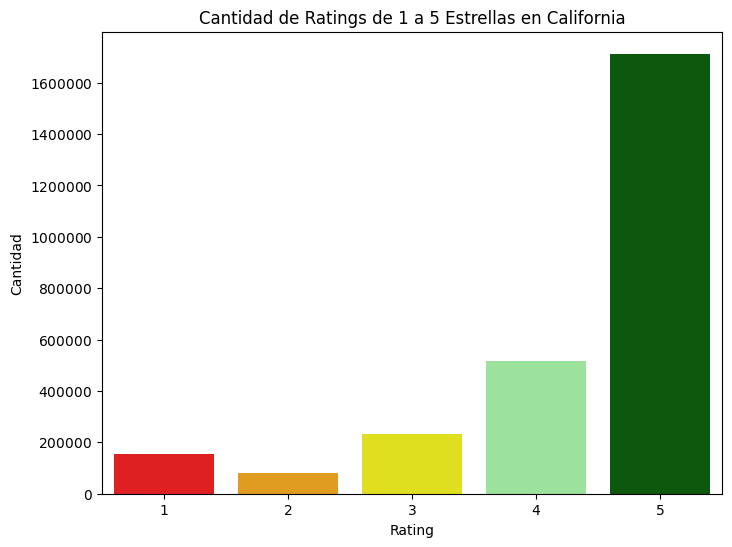

In [22]:
# Define un diccionario de colores para cada rating
rating_colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Convierte la columna 'rating_color' a una lista
palette_colors = [rating_colors[rating] for rating in sorted(df_california['rating'].unique())]

# Genera un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', hue='rating', data=df_california, palette=palette_colors, legend=False)

# Añade etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Cantidad de Ratings de 1 a 5 Estrellas en California')

# Desactiva la notación científica en el eje Y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # Esto evita que use notación científica

# Muestra el gráfico
plt.show()


In [13]:
# Filtra el DataFrame solo para las reseñas de 5 estrellas
df_5_star = df_california[df_california['rating'] == 5]

# Cuenta la cantidad de reseñas de 5 estrellas por cada gmap_id
gmap_id_counts = df_5_star['gmap_id'].value_counts()

# Convierte los resultados a un DataFrame para facilitar el manejo
df_gmap_id_counts = gmap_id_counts.reset_index()
df_gmap_id_counts.columns = ['gmap_id', 'count']

# Ordena el DataFrame en orden descendente por la cantidad de reseñas
df_gmap_id_counts = df_gmap_id_counts.sort_values(by='count', ascending=False)

df_gmap_id_counts

,gmap_id,count
0,0x40771e59f0513085:0x513683476a2005d8,4785
1,0x8094673195546f4b:0xee80b918abd281d6,4617
2,0x808f7d71f302a28d:0x75fd486edbc13dd7,3848
3,0x80c2b4f97a0167a3:0xe4e4b4b9a5ecd026,3429
4,0x80ec84fd38f0735f:0x445f88fa1ca91e6c,3181
...,...,...
73215,0x80c36f16cea11cb3:0xcd8c05fe3bc634b3,1
73216,0x80905439679a174f:0xe9d3b8485ebdfc77,1
73217,0x80ec685e0629d6d1:0xc5e21dcc7ac3845a,1
73218,0x80c2d258eaf24001:0x4d6ef160f7d9478a,1


Podemos rastrear cuales son los gmap_id con mayor cantidad de reviews de 5*, mas adelante deberemos cruzar esa data para descubrir de que negocio se trata

In [14]:
df_delaware = joinjson('review-Delaware/*.json')
df_delaware

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.120359e+20,Carmen Martinez,1563683255396,5,Great service,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
1,1.038773e+20,Frank Murphy,1561535111561,2,Good for the kids,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
2,1.051621e+20,Antwine _,1566083152127,5,Loved it,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
3,1.111030e+20,Brian Herne,1600286342502,5,God food,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
4,1.156045e+20,Ada Reyes,1525054615749,1,The service took very long even dough there wa...,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
...,...,...,...,...,...,...,...,...
905532,1.046677e+20,Nina Savage,1561512984371,5,Great place,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
905533,1.077670e+20,Millicent Hueston,1547434699877,5,Our waitress was exceptional,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
905534,1.044457e+20,Jeremy Morgan,1542050548409,2,"Food is Applebee’s quality, staff and service ...",None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
905535,1.123871e+20,Alesha Green,1491538290492,1,Never get there carside horrible experience,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a


En comparacion a California observamos una baja drastica de reviews. Podemos atribuir esto a la diferencia poblaacional 39,3 millones en California contra 1.03 en Delaware.

In [15]:
df_delaware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905537 entries, 0 to 905536
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  905537 non-null  float64
 1   name     905537 non-null  object 
 2   time     905537 non-null  int64  
 3   rating   905537 non-null  int64  
 4   text     497198 non-null  object 
 5   pics     19031 non-null   object 
 6   resp     98075 non-null   object 
 7   gmap_id  905537 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 55.3+ MB


In [16]:
df_delaware[df_delaware["rating"] ==5]

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.120359e+20,Carmen Martinez,1563683255396,5,Great service,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
2,1.051621e+20,Antwine _,1566083152127,5,Loved it,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
3,1.111030e+20,Brian Herne,1600286342502,5,God food,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
5,1.148436e+20,Derrick Chambers,1484571321500,5,The food is always good at this location,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
7,1.077670e+20,Millicent Hueston,1547434699877,5,Our waitress was exceptional,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
...,...,...,...,...,...,...,...,...
905527,1.089619e+20,Troy Dennis,1550762270014,5,Great Bartenders,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
905528,1.180764e+20,Erlene Curtis,1510658315685,5,Offering very good specials at this time,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
905531,1.007368e+20,Robin Cooper,1551457519339,5,Great,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a
905532,1.046677e+20,Nina Savage,1561512984371,5,Great place,None,None,0x89c706aa414d3a5f:0x8892fa37de5b9b7a


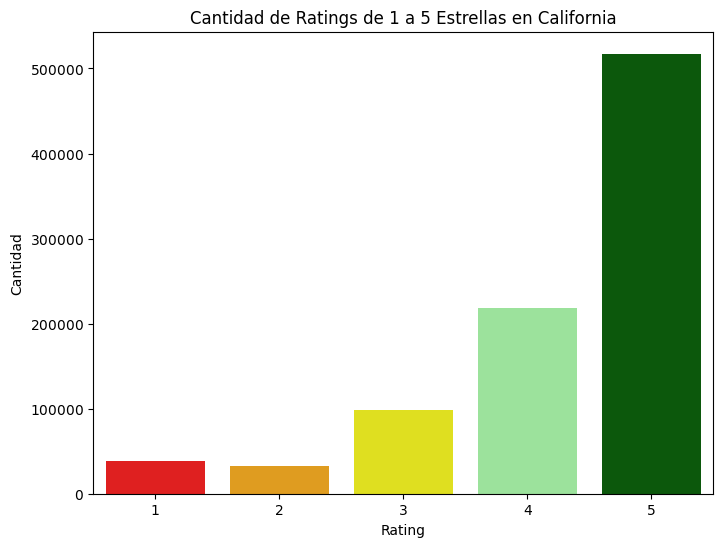

In [23]:
# Define un diccionario de colores para cada rating
rating_colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Convierte la columna 'rating_color' a una lista
palette_colors = [rating_colors[rating] for rating in sorted(df_delaware['rating'].unique())]

# Genera un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', hue='rating', data=df_delaware, palette=palette_colors, legend=False)

# Añade etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Cantidad de Ratings de 1 a 5 Estrellas en Delaware')

# Desactiva la notación científica en el eje Y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # Esto evita que use notación científica

# Muestra el gráfico
plt.show()

In [25]:
# Filtra el DataFrame solo para las reseñas de 5 estrellas
df_5_star = df_delaware[df_delaware['rating'] == 5]

# Cuenta la cantidad de reseñas de 5 estrellas por cada gmap_id
gmap_id_counts = df_5_star['gmap_id'].value_counts()

# Convierte los resultados a un DataFrame para facilitar el manejo
df_gmap_id_counts = gmap_id_counts.reset_index()
df_gmap_id_counts.columns = ['gmap_id', 'count']

# Ordena el DataFrame en orden descendente por la cantidad de reseñas
df_gmap_id_counts = df_gmap_id_counts.sort_values(by='count', ascending=False)

df_gmap_id_counts

,gmap_id,count
0,0x89c7013dfd671915:0x785b04879852dede,2946
1,0x89b8b66e7f2ae3a9:0xc6170639cfe75781,2169
2,0x89b8b66ef9914e01:0x9645473cd6ed1690,2137
3,0x89c703ec89c42a3f:0xb027e0137b82a937,2046
4,0x89b8b6d449da5e37:0xef05ecc779df7a41,1589
...,...,...
8067,0x89c701e48329c9df:0xd14511b974b19485,1
8066,0x89c6fe019d2658e1:0x13548e67491a32ad,1
8064,0x89b8ce3528f7792d:0x498130b2d4070099,1
8063,0x89b8c09c75379c71:0x81b570270d09f318,1


In [26]:
df_illinois = joinjson('review-Illinois/*.json')
df_illinois

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.154850e+20,Torie Turner,1498754042679,4,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
1,1.004102e+20,Tabitha Fefee,1536349644695,3,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
2,1.136348e+20,claudette Durr,1610764908592,5,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
3,1.019100e+20,Dora Betancourt,1540748119741,3,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
4,1.029625e+20,Ronald Henry,1490699289421,5,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
...,...,...,...,...,...,...,...,...
2099995,1.055523e+20,Cindy Neath,1546825827465,5,Like them,None,None,0x8808bbdd68f8761b:0x8c518beb56b4f3ca
2099996,1.020356e+20,David Mauer,1541157502008,5,Loved It!,None,None,0x8808bbdd68f8761b:0x8c518beb56b4f3ca
2099997,1.002122e+20,Bloodkisses333,1517804540149,5,Local and awesome!,None,None,0x8808bbdd68f8761b:0x8c518beb56b4f3ca
2099998,1.094001e+20,Kevin Sircloumb,1553131495401,4,Very convenient to get in and out,None,None,0x8808bbdd68f8761b:0x8c518beb56b4f3ca


In [27]:
df_illinois.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100000 entries, 0 to 2099999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 128.2+ MB


In [28]:
df_illinois[df_illinois['rating']==5]

,user_id,name,time,rating,text,pics,resp,gmap_id
2,1.136348e+20,claudette Durr,1610764908592,5,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
4,1.029625e+20,Ronald Henry,1490699289421,5,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
9,1.093611e+20,Jessica Benefor,1577247100601,5,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
12,1.056617e+20,Arma Bentley,1548591335231,5,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
15,1.176544e+20,Miss jackson,1518536757645,5,None,None,None,0x880e18a25768a29f:0x41448c69f1558463
...,...,...,...,...,...,...,...,...
2099994,1.042639e+20,Deb MacKusick,1503421990068,5,Very helpful and friendly. Lots of choices.,None,None,0x8808bbdd68f8761b:0x8c518beb56b4f3ca
2099995,1.055523e+20,Cindy Neath,1546825827465,5,Like them,None,None,0x8808bbdd68f8761b:0x8c518beb56b4f3ca
2099996,1.020356e+20,David Mauer,1541157502008,5,Loved It!,None,None,0x8808bbdd68f8761b:0x8c518beb56b4f3ca
2099997,1.002122e+20,Bloodkisses333,1517804540149,5,Local and awesome!,None,None,0x8808bbdd68f8761b:0x8c518beb56b4f3ca


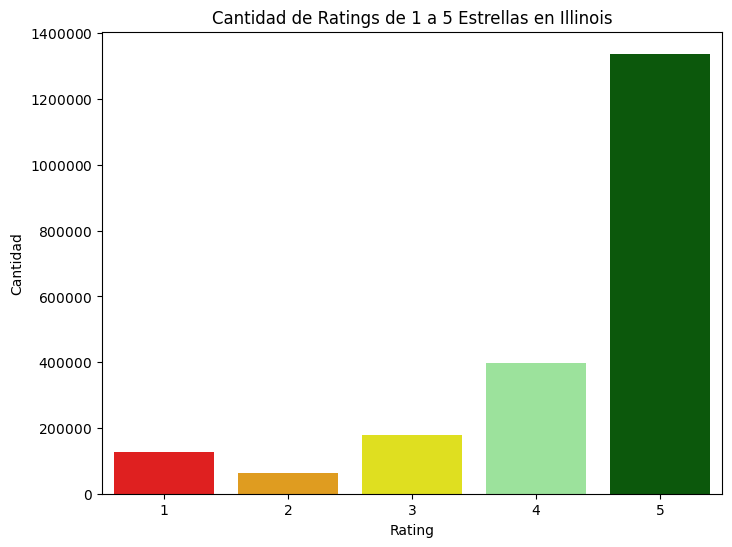

In [29]:
# Define un diccionario de colores para cada rating
rating_colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Convierte la columna 'rating_color' a una lista
palette_colors = [rating_colors[rating] for rating in sorted(df_illinois['rating'].unique())]

# Genera un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', hue='rating', data=df_illinois, palette=palette_colors, legend=False)

# Añade etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Cantidad de Ratings de 1 a 5 Estrellas en Illinois')

# Desactiva la notación científica en el eje Y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # Esto evita que use notación científica

# Muestra el gráfico
plt.show()

In [30]:
# Filtra el DataFrame solo para las reseñas de 5 estrellas
df_5_star = df_illinois[df_illinois['rating'] == 5]

# Cuenta la cantidad de reseñas de 5 estrellas por cada gmap_id
gmap_id_counts = df_5_star['gmap_id'].value_counts()

# Convierte los resultados a un DataFrame para facilitar el manejo
df_gmap_id_counts = gmap_id_counts.reset_index()
df_gmap_id_counts.columns = ['gmap_id', 'count']

# Ordena el DataFrame en orden descendente por la cantidad de reseñas
df_gmap_id_counts = df_gmap_id_counts.sort_values(by='count', ascending=False)

df_gmap_id_counts

,gmap_id,count
0,0x880fd3bf49d54e33:0xfaa2e94c6971f519,5046
1,0x880fd3b2e59adf21:0x1cea3ee176ddd646,4406
2,0x880fd36b093a9a07:0x940cc06f90294db,4286
3,0x880e2ca3e2d94695:0x4829f3cc9ca2d0de,3788
4,0x880e2b587c65e43b:0xab7aa63b15c80bf8,3705
...,...,...
49391,0x880e28fc63511229:0x7772edaded66e45f,1
49390,0x880fce91a95152e7:0xf86b6fa3c45f217c,1
49389,0x880faf45c587a80b:0xc529440a34685b05,1
49388,0x880e485a5cb8c921:0xf9ff12d0aeac7036,1


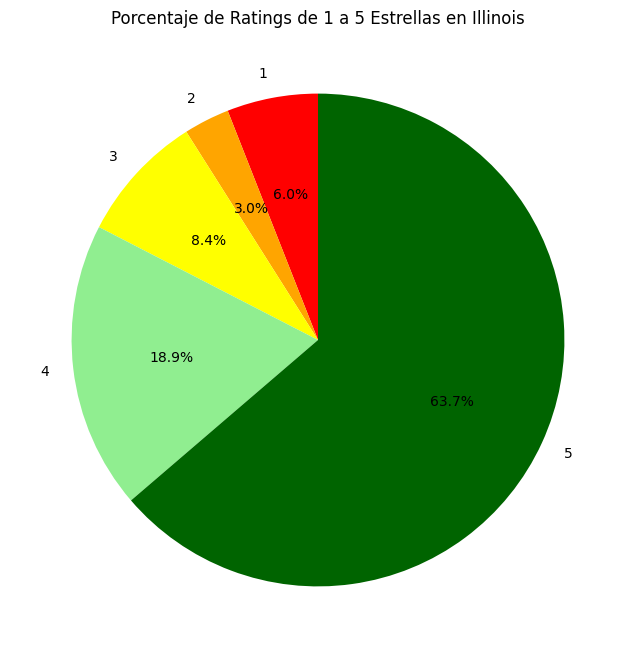

In [34]:
# Define un diccionario de colores para cada rating
rating_colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Obtiene los ratings y sus colores en el orden correcto
ratings_order = sorted(df_illinois['rating'].unique())
palette_colors = [rating_colors[rating] for rating in ratings_order]

# Cuenta la cantidad de ocurrencias de cada rating
rating_counts = df_illinois['rating'].value_counts()

# Ordena los datos según el rating
rating_counts = rating_counts.sort_index()

# Genera un gráfico circular (pie chart) con colores personalizados
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=ratings_order, autopct='%1.1f%%', colors=palette_colors, startangle=90)

# Añade título
plt.title('Porcentaje de Ratings de 1 a 5 Estrellas en Illinois')

# Muestra el gráfico
plt.show()


In [35]:
df_idaho = joinjson('review-Idaho/*.json')
df_idaho

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.118639e+20,itts britts,1590353828509,3,It's an okay store. They have a tone of stuff ...,None,None,0x5361ebf6e1b745af:0x5e2248fa8e93299f
1,1.089572e+20,Amy Miles,1590179177781,4,Has a few extra items you can't find at grocer...,None,None,0x5361ebf6e1b745af:0x5e2248fa8e93299f
2,1.033494e+20,Andrew Baker,1591906549784,4,Pretty cool store lots of yard stuff,None,None,0x5361ebf6e1b745af:0x5e2248fa8e93299f
3,1.108691e+20,Katherine Remsburg,1591147565864,5,Great little place very friendly..,None,None,0x5361ebf6e1b745af:0x5e2248fa8e93299f
4,1.148147e+20,paul biggs,1607217244889,5,Awesome store!,None,"{'time': 1607460544948, 'text': 'Thank you, Pa...",0x5361ebf6e1b745af:0x5e2248fa8e93299f
...,...,...,...,...,...,...,...,...
2085482,1.139755e+20,Jessica Acevedo,1568997679845,5,None,None,None,0x5354434e88c30241:0x3da91c68addecfd8
2085483,1.131434e+20,Tanya Prall,1575805837000,2,None,None,None,0x5354434e88c30241:0x3da91c68addecfd8
2085484,1.140981e+20,Benjamin Phillips,1581290167904,3,None,None,None,0x5354434e88c30241:0x3da91c68addecfd8
2085485,1.139393e+20,Carol Albertson,1574014581140,5,None,None,None,0x5354434e88c30241:0x3da91c68addecfd8


In [36]:
df_idaho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085487 entries, 0 to 2085486
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 127.3+ MB


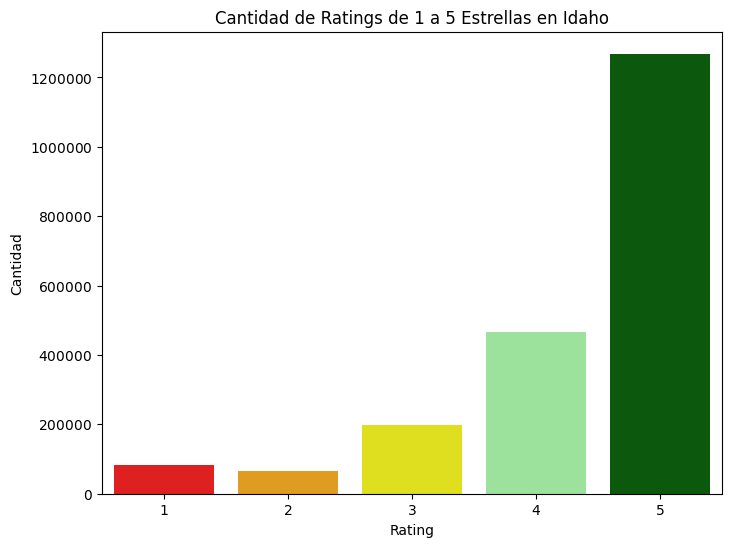

In [37]:
# Define un diccionario de colores para cada rating
rating_colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Convierte la columna 'rating_color' a una lista
palette_colors = [rating_colors[rating] for rating in sorted(df_idaho['rating'].unique())]

# Genera un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', hue='rating', data=df_idaho, palette=palette_colors, legend=False)

# Añade etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Cantidad de Ratings de 1 a 5 Estrellas en Idaho')

# Desactiva la notación científica en el eje Y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # Esto evita que use notación científica

# Muestra el gráfico
plt.show()

In [39]:
df_louisiana = joinjson('review-Louisiana/*.json')
df_louisiana

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.038949e+20,Stacey Harmson,1462600014123,5,None,None,None,0x862f1241e22b8c47:0x10a9c8ec2c19c498
1,1.033068e+20,Amber Driggers,1536862454240,3,None,None,None,0x862f1241e22b8c47:0x10a9c8ec2c19c498
2,1.015649e+20,Melinda Crum,1530129171037,5,None,None,None,0x862f1241e22b8c47:0x10a9c8ec2c19c498
3,1.000166e+20,Michael French,1506908737423,5,None,None,None,0x862f1241e22b8c47:0x10a9c8ec2c19c498
4,1.008682e+20,Dewayne Mann,1550354659667,5,None,None,None,0x862f1241e22b8c47:0x10a9c8ec2c19c498
...,...,...,...,...,...,...,...,...
1499995,1.148989e+20,Jared Ware,1562025130824,5,It's all soooooo good,None,None,0x86213de9159f74a3:0xfcb835497a40af5e
1499996,1.002717e+20,Michelle Scarborough,1573820100467,5,Our favorite buffet,None,None,0x86213de9159f74a3:0xfcb835497a40af5e
1499997,1.003407e+20,Vasily Bender,1470802132373,3,"Great food selection, customer service is OK",None,None,0x86213de9159f74a3:0xfcb835497a40af5e
1499998,1.032592e+20,Judith Angelette,1503067322006,1,Is too expensive for the food that they offer ...,None,None,0x86213de9159f74a3:0xfcb835497a40af5e


In [40]:
df_louisiana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   user_id  1500000 non-null  float64
 1   name     1500000 non-null  object 
 2   time     1500000 non-null  int64  
 3   rating   1500000 non-null  int64  
 4   text     789116 non-null   object 
 5   pics     35628 non-null    object 
 6   resp     160140 non-null   object 
 7   gmap_id  1500000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 91.6+ MB


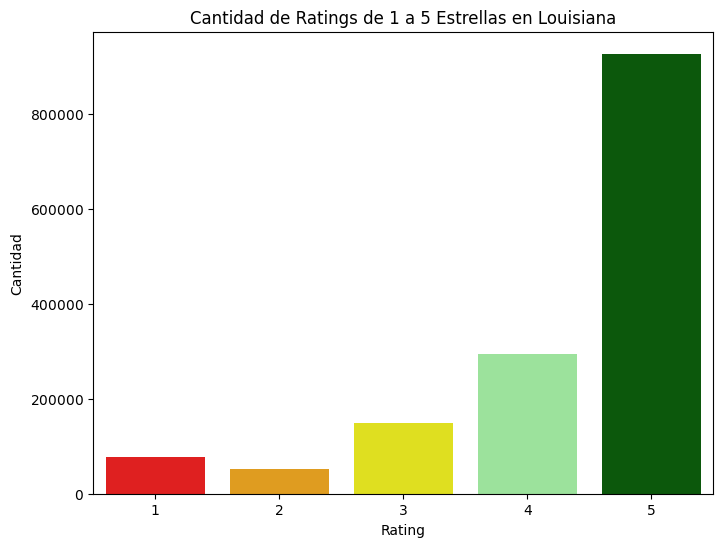

In [41]:
# Define un diccionario de colores para cada rating
rating_colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Convierte la columna 'rating_color' a una lista
palette_colors = [rating_colors[rating] for rating in sorted(df_louisiana['rating'].unique())]

# Genera un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', hue='rating', data=df_louisiana, palette=palette_colors, legend=False)

# Añade etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Cantidad de Ratings de 1 a 5 Estrellas en Louisiana')

# Desactiva la notación científica en el eje Y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # Esto evita que use notación científica

# Muestra el gráfico
plt.show()

In [42]:
df_missouri = joinjson('review-Missouri/*.json')
df_missouri

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.058692e+20,Marietta Burchett,1568147071670,5,None,None,None,0x87c01c6fa8299325:0x7f20137fba308171
1,1.175371e+20,Tammy Arnold,1515606659166,5,None,None,None,0x87c01c6fa8299325:0x7f20137fba308171
2,1.045040e+20,Terri,1599930162553,5,None,None,None,0x87c01c6fa8299325:0x7f20137fba308171
3,1.137027e+20,Everett Pottorff,1577462446302,5,None,None,None,0x87c01c6fa8299325:0x7f20137fba308171
4,1.038940e+20,Kambrea Dyreng,1610494605886,5,None,None,None,0x87c01c6fa8299325:0x7f20137fba308171
...,...,...,...,...,...,...,...,...
1649995,1.036469e+20,Mark,1509297527199,4,None,None,None,0x88778bf7b76136e9:0x45b17ddec8e1f978
1649996,1.056938e+20,Angela Brown,1577505155005,2,None,None,None,0x88778bf7b76136e9:0x45b17ddec8e1f978
1649997,1.008615e+20,Sue Ann Taylor,1513169616567,4,None,None,None,0x88778bf7b76136e9:0x45b17ddec8e1f978
1649998,1.114684e+20,Elizabeth Berthold,1617942030115,4,None,None,None,0x88778bf7b76136e9:0x45b17ddec8e1f978


In [43]:
df_missouri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650000 entries, 0 to 1649999
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   user_id  1650000 non-null  float64
 1   name     1650000 non-null  object 
 2   time     1650000 non-null  int64  
 3   rating   1650000 non-null  int64  
 4   text     952732 non-null   object 
 5   pics     39723 non-null    object 
 6   resp     230759 non-null   object 
 7   gmap_id  1650000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 100.7+ MB


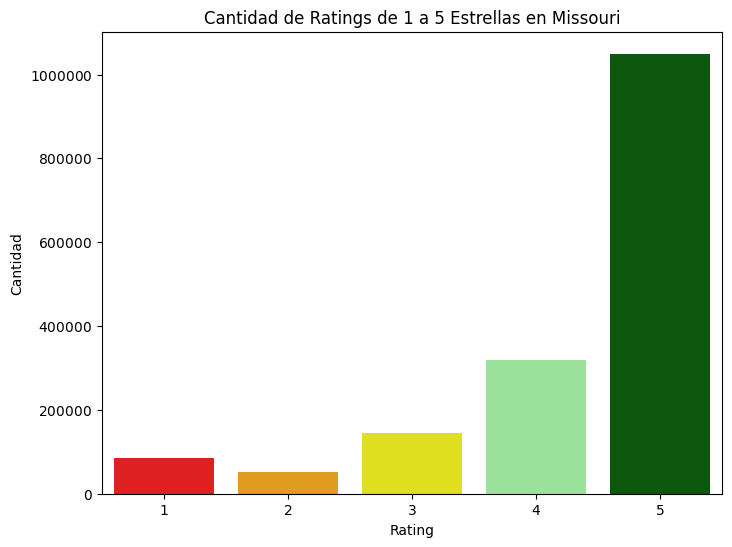

In [44]:
# Define un diccionario de colores para cada rating
rating_colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Convierte la columna 'rating_color' a una lista
palette_colors = [rating_colors[rating] for rating in sorted(df_missouri['rating'].unique())]

# Genera un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', hue='rating', data=df_missouri, palette=palette_colors, legend=False)

# Añade etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Cantidad de Ratings de 1 a 5 Estrellas en Missouri')

# Desactiva la notación científica en el eje Y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # Esto evita que use notación científica

# Muestra el gráfico
plt.show()

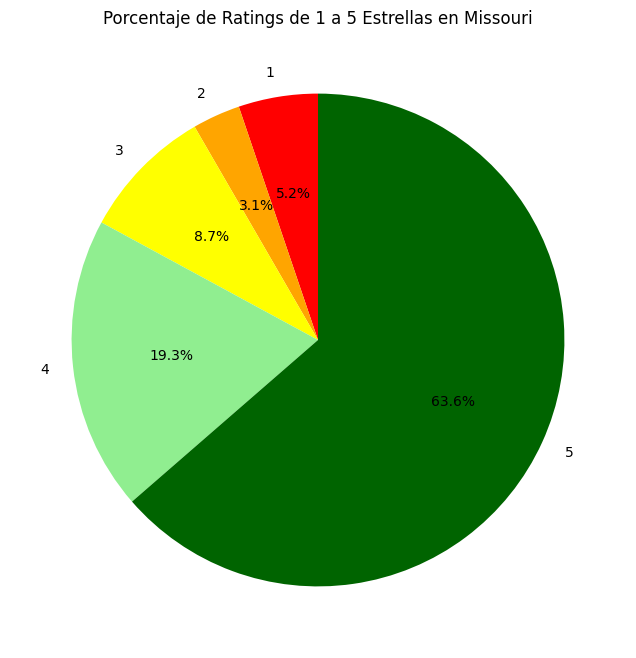

In [45]:
# Define un diccionario de colores para cada rating
rating_colors = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'darkgreen'}

# Obtiene los ratings y sus colores en el orden correcto
ratings_order = sorted(df_missouri['rating'].unique())
palette_colors = [rating_colors[rating] for rating in ratings_order]

# Cuenta la cantidad de ocurrencias de cada rating
rating_counts = df_missouri['rating'].value_counts()

# Ordena los datos según el rating
rating_counts = rating_counts.sort_index()

# Genera un gráfico circular (pie chart) con colores personalizados
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=ratings_order, autopct='%1.1f%%', colors=palette_colors, startangle=90)

# Añade título
plt.title('Porcentaje de Ratings de 1 a 5 Estrellas en Missouri')

# Muestra el gráfico
plt.show()

Finanlizando el EDA preliminar podemos ver que se mantienen altos los porcentajes de reviews de 5*
Como una consultora especializada en Gastronomia y Servicio al Cliente entendemos cualquier valor menor al maximo como una evaluacion sobre nuestro producto y una amplia ventana de mejora.


Prestando atencion al dataset podemos previsualizar un ETL para futuras funcionalidades, retirando : time, text, pic y resp ya que no son representantivo para nuestro analisis.